# Aim and motivation
The primary reason I have chosen to create this kernel is to practice and use RNNs for various tasks and applications. First of which is time series data. RNNs have truly changed the way sequential data is forecasted. My goal here is to create the ultimate reference for RNNs here on kaggle.

## Things to remember
* Please upvote(like button) and share this kernel if you like it. This would increase its visibility and more people will be able to learn about the awesomeness of RNNs.
* I will use keras for this kernel. If you are not familiar with keras or neural networks, refer to this kernel/tutorial of mine:  https://www.kaggle.com/thebrownviking20/intro-to-keras-with-breast-cancer-data-ann
* Your doubts and curiousity about time series can be taken care of here: https://www.kaggle.com/thebrownviking20/everything-you-can-do-with-a-time-series
* Don't let the explanations intimidate you. It's simpler than you think.
* Eventually, I will add more applications of LSTMs. So stay tuned for more!
* The code is inspired from Kirill Eremenko's Deep Learning Course: https://www.udemy.com/deeplearning/

## Recurrent Neural Networks
In a recurrent neural network we store the output activations from one or more of the layers of the network. Often these are hidden later activations. Then, the next time we feed an input example to the network, we include the previously-stored outputs as additional inputs. You can think of the additional inputs as being concatenated to the end of the “normal” inputs to the previous layer. For example, if a hidden layer had 10 regular input nodes and 128 hidden nodes in the layer, then it would actually have 138 total inputs (assuming you are feeding the layer’s outputs into itself à la Elman) rather than into another layer). Of course, the very first time you try to compute the output of the network you’ll need to fill in those extra 128 inputs with 0s or something.

Source: [Quora](https://www.quora.com/What-is-a-simple-explanation-of-a-recurrent-neural-network)
<img src="https://cdn-images-1.medium.com/max/1600/1*NKhwsOYNUT5xU7Pyf6Znhg.png">

Source: [Medium](https://medium.com/ai-journal/lstm-gru-recurrent-neural-networks-81fe2bcdf1f9)

Let me give you the best explanation of Recurrent Neural Networks that I found on internet: https://www.youtube.com/watch?v=UNmqTiOnRfg&t=3s

Now, even though RNNs are quite powerful, they suffer from  **Vanishing gradient problem ** which hinders them from using long term information, like they are good for storing memory 3-4 instances of past iterations but larger number of instances don't provide good results so we don't just use regular RNNs. Instead, we use a better variation of RNNs: **Long Short Term Networks(LSTM).**

### What is Vanishing Gradient problem?
Vanishing gradient problem is a difficulty found in training artificial neural networks with gradient-based learning methods and backpropagation. In such methods, each of the neural network's weights receives an update proportional to the partial derivative of the error function with respect to the current weight in each iteration of training. The problem is that in some cases, the gradient will be vanishingly small, effectively preventing the weight from changing its value. In the worst case, this may completely stop the neural network from further training. As one example of the problem cause, traditional activation functions such as the hyperbolic tangent function have gradients in the range (0, 1), and backpropagation computes gradients by the chain rule. This has the effect of multiplying n of these small numbers to compute gradients of the "front" layers in an n-layer network, meaning that the gradient (error signal) decreases exponentially with n while the front layers train very slowly.

Source: [Wikipedia](https://en.wikipedia.org/wiki/Vanishing_gradient_problem)

<img src="https://cdn-images-1.medium.com/max/1460/1*FWy4STsp8k0M5Yd8LifG_Q.png">

Source: [Medium](https://medium.com/@anishsingh20/the-vanishing-gradient-problem-48ae7f501257)

## Long Short Term Memory(LSTM)
Long short-term memory (LSTM) units (or blocks) are a building unit for layers of a recurrent neural network (RNN). A RNN composed of LSTM units is often called an LSTM network. A common LSTM unit is composed of a cell, an input gate, an output gate and a forget gate. The cell is responsible for "remembering" values over arbitrary time intervals; hence the word "memory" in LSTM. Each of the three gates can be thought of as a "conventional" artificial neuron, as in a multi-layer (or feedforward) neural network: that is, they compute an activation (using an activation function) of a weighted sum. Intuitively, they can be thought as regulators of the flow of values that goes through the connections of the LSTM; hence the denotation "gate". There are connections between these gates and the cell.

The expression long short-term refers to the fact that LSTM is a model for the short-term memory which can last for a long period of time. An LSTM is well-suited to classify, process and predict time series given time lags of unknown size and duration between important events. LSTMs were developed to deal with the exploding and vanishing gradient problem when training traditional RNNs.

Source: [Wikipedia](https://en.wikipedia.org/wiki/Long_short-term_memory)

<img src="https://cdn-images-1.medium.com/max/1600/0*LyfY3Mow9eCYlj7o.">

Source: [Medium](https://codeburst.io/generating-text-using-an-lstm-network-no-libraries-2dff88a3968)

The best LSTM explanation on internet: https://medium.com/deep-math-machine-learning-ai/chapter-10-1-deepnlp-lstm-long-short-term-memory-networks-with-math-21477f8e4235

Refer above link for deeper insights.

## Components of LSTMs
So the LSTM cell contains the following components
* Forget Gate “f” ( a neural network with sigmoid)
* Candidate layer “C"(a NN with Tanh)
* Input Gate “I” ( a NN with sigmoid )
* Output Gate “O”( a NN with sigmoid)
* Hidden state “H” ( a vector )
* Memory state “C” ( a vector)

* Inputs to the LSTM cell at any step are X<sub>t</sub> (current input) , H<sub>t-1</sub> (previous hidden state ) and C<sub>t-1</sub> (previous memory state).  
* Outputs from the LSTM cell are H<sub>t</sub> (current hidden state ) and C<sub>t</sub> (current memory state)

# 1.LSTMs
First, LSTM cell takes the previous memory state C<sub>t-1</sub> and does element wise multiplication with forget gate (f) to decide if  present memory state C<sub>t</sub>. If forget gate value is 0 then previous memory state is completely forgotten else f forget gate value is 1 then previous memory state is completely passed to the cell ( Remember f gate gives values between 0 and 1 ).

**C<sub>t</sub> = C<sub>t-1</sub> * f<sub>t</sub>**

Calculating the new memory state: 

**C<sub>t</sub> = C<sub>t</sub> + (I<sub>t</sub> * C\`<sub>t</sub>)**

Now, we calculate the output:

**H<sub>t</sub> = tanh(C<sub>t</sub>)**

### And now we get to the code...
I will use LSTMs for predicting the price of stocks of IBM for the year 2017

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.layers import RepeatVector, TimeDistributed, Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [ ]:
# Some functions to help out with
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real IBM Stock Price')
    plt.plot(predicted, color='blue',label='Predicted IBM Stock Price')
    plt.title('IBM Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('IBM Stock Price')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [ ]:
# First, we get the data
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Time series forcasting/Kaggle 30 Stock time series/Data/IBM_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
dataset.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


In [ ]:
# Checking for missing values
training_set = dataset[:'2016'].iloc[:,1:2].values
test_set = dataset['2017':].iloc[:,1:2].values

In [ ]:
print(training_set.shape)
print(test_set.shape)

(2769, 1)
(251, 1)


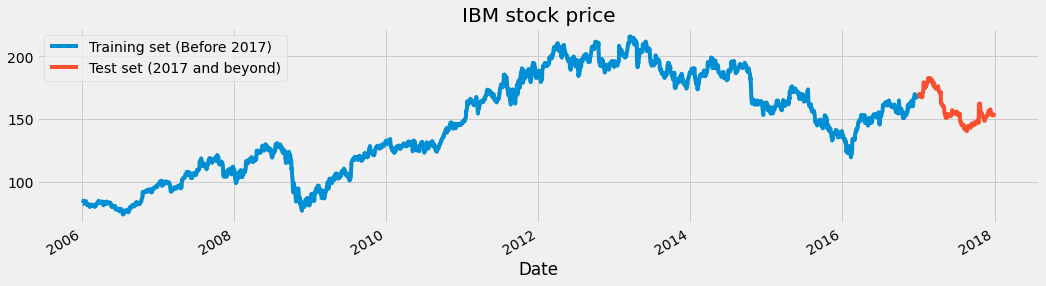

In [ ]:
# We have chosen 'High' attribute for prices. Let's see what it looks like
dataset["High"][:'2016'].plot(figsize=(16,4),legend=True)
dataset["High"]['2017':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2017)','Test set (2017 and beyond)'])
plt.title('IBM stock price')
plt.show()

## Train test split

In [ ]:
# Scaling the training set
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
# Since LSTMs store long term memory state, we create a data structure with 60 timesteps and 1 output
# So for each element of training set, we have 60 previous training set elements 
X_train = []
y_train = []
for i in range(60,2769):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
print(X_train.shape)
print(y_train.shape)
X_train

(2709, 60)
(2709,)


array([[0.06065089, 0.06029868, 0.06311637, ..., 0.0656523 , 0.06656805,
        0.06769513],
       [0.06029868, 0.06311637, 0.0781206 , ..., 0.06656805, 0.06769513,
        0.06875176],
       [0.06311637, 0.0781206 , 0.07262609, ..., 0.06769513, 0.06875176,
        0.06804734],
       ...,
       [0.594745  , 0.59587208, 0.59094111, ..., 0.66420118, 0.65898845,
        0.66244012],
       [0.59587208, 0.59094111, 0.58812342, ..., 0.65898845, 0.66244012,
        0.66074951],
       [0.59094111, 0.58812342, 0.59002536, ..., 0.66244012, 0.66074951,
        0.65546633]])

In [ ]:
# Reshaping X_train for efficient modelling
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
print(X_train.shape)
#X_train[:3]

In [ ]:
print(y_train.shape)
y_train

(2709,)


array([0.06875176, 0.06804734, 0.06797689, ..., 0.66074951, 0.65546633,
       0.6534235 ])

In [ ]:
# Now to get the test set ready in a similar way as the training set.
# The following has been done so forst 60 entires of test set have 60 previous values which is impossible to get unless we take the whole 
# 'High' attribute data for processing
dataset_total = pd.concat((dataset["High"][:'2016'],dataset["High"]['2017':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
# Lay them 60 gia tri truoc test set (an vo phan training set) de predict
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

print(dataset_total.shape)
print(test_set.shape)
print(inputs.shape)

# Preparing X_test and predicting the prices
X_test = []
for i in range(60,311):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
print(X_test.shape)
X_test[:1]

It is many to one (many input with 60 timestep, 1 output)

In [ ]:
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1))) # 60 timesteps, 1 feature
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)               

In [ ]:
# Fitting to the training set
callbacks = [EarlyStopping(monitor="val_loss", patience=3, 
                           mode='min',restore_best_weights=True),
            ModelCheckpoint(filepath="best_model.h5",monitor="val_loss",
                            save_best_only=True)
            ]

regressor.fit(X_train,y_train,epochs=50,batch_size=32,
              validation_split=0.2,callbacks=callbacks)

Train on 2167 samples, validate on 542 samples
Epoch 1/50
2167/2167 [==============================] - 40s 18ms/step - loss: 0.0084 - val_loss: 0.0046
Epoch 2/50
2167/2167 [==============================] - 40s 18ms/step - loss: 0.0068 - val_loss: 0.0014
Epoch 3/50
2167/2167 [==============================] - 40s 18ms/step - loss: 0.0063 - val_loss: 0.0030
Epoch 4/50
2167/2167 [==============================] - 40s 18ms/step - loss: 0.0053 - val_loss: 0.0183
Epoch 5/50
2167/2167 [==============================] - 40s 18ms/step - loss: 0.0055 - val_loss: 0.0012
Epoch 6/50
2167/2167 [==============================] - 40s 18ms/step - loss: 0.0050 - val_loss: 9.4594e-04
Epoch 7/50
2167/2167 [==============================] - 40s 19ms/step - loss: 0.0047 - val_loss: 0.0061
Epoch 8/50
2167/2167 [==============================] - 40s 18ms/step - loss: 0.0045 - val_loss: 7.7320e-04
Epoch 9/50
2167/2167 [==============================] - 40s 18ms/step - loss: 0.0042 - val_loss: 0.0034
Epoch 10/

In [ ]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price

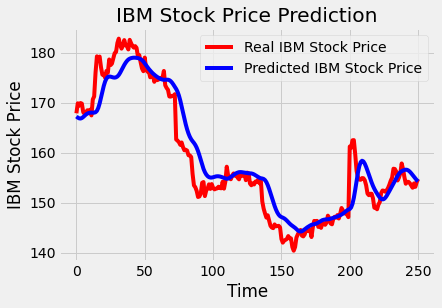

In [ ]:
# Visualizing the results for LSTM
plot_predictions(test_set,predicted_stock_price)

In [ ]:
# Evaluating our model
return_rmse(test_set,predicted_stock_price)

The root mean squared error is 3.7630124302441654.


 # 2.Bidirectional LSTM

In [ ]:
# The LSTM architecture
regressor_Bi = Sequential()
# First LSTM layer with Dropout regularisation
regressor_Bi.add(Bidirectional(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))) # 60 timesteps, 1 feature
regressor_Bi.add(Dropout(0.2))
# Second LSTM layer
regressor_Bi.add(Bidirectional(LSTM(units=50, return_sequences=True)))
regressor_Bi.add(Dropout(0.2))
# Third LSTM layer
regressor_Bi.add(Bidirectional(LSTM(units=50, return_sequences=True)))
regressor_Bi.add(Dropout(0.2))
# Fourth LSTM layer
regressor_Bi.add(Bidirectional(LSTM(units=50)))
regressor_Bi.add(Dropout(0.2))
# The output layer
regressor_Bi.add(Dense(units=1))

# Compiling the RNN
regressor_Bi.compile(optimizer='adam',loss='mean_squared_error')
#regressor_Bi.summary()

In [ ]:
# Fitting to the training set
callbacks = [EarlyStopping(monitor="val_loss", patience=3, 
                           mode='min',restore_best_weights=True),
            ModelCheckpoint(filepath="best_model.h5",monitor="val_loss",
                            save_best_only=True)
            ]

regressor_Bi.fit(X_train,y_train,epochs=50,batch_size=32,
              validation_split=0.2,callbacks=callbacks)

Train on 2167 samples, validate on 542 samples
Epoch 1/50
2167/2167 [==============================] - 82s 38ms/step - loss: 0.0180 - val_loss: 0.0026
Epoch 2/50
2167/2167 [==============================] - 78s 36ms/step - loss: 0.0037 - val_loss: 0.0024
Epoch 3/50
2167/2167 [==============================] - 78s 36ms/step - loss: 0.0031 - val_loss: 0.0015
Epoch 4/50
2167/2167 [==============================] - 77s 36ms/step - loss: 0.0030 - val_loss: 0.0012
Epoch 5/50
2167/2167 [==============================] - 77s 36ms/step - loss: 0.0026 - val_loss: 9.3189e-04
Epoch 6/50
2167/2167 [==============================] - 77s 36ms/step - loss: 0.0030 - val_loss: 0.0034
Epoch 7/50
2167/2167 [==============================] - 78s 36ms/step - loss: 0.0030 - val_loss: 9.9473e-04
Epoch 8/50
2167/2167 [==============================] - 77s 36ms/step - loss: 0.0023 - val_loss: 0.0024


In [ ]:
regressor_Bi.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_9 (Bidirection (None, 60, 100)           20800     
_________________________________________________________________
dropout_17 (Dropout)         (None, 60, 100)           0         
_________________________________________________________________
bidirectional_10 (Bidirectio (None, 60, 100)           60400     
_________________________________________________________________
dropout_18 (Dropout)         (None, 60, 100)           0         
_________________________________________________________________
bidirectional_11 (Bidirectio (None, 60, 100)           60400     
_________________________________________________________________
dropout_19 (Dropout)         (None, 60, 100)           0         
_________________________________________________________________
bidirectional_12 (Bidirectio (None, 100)              

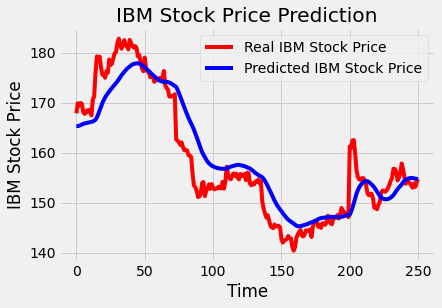

The root mean squared error is 4.636476208791449.


In [ ]:
predicted_stock_price = regressor_Bi.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
# Visualizing the results for LSTM
plot_predictions(test_set,predicted_stock_price)
# Evaluating our model
return_rmse(test_set,predicted_stock_price)

Truth be told. That's one awesome score. 

LSTM is not the only kind of unit that has taken the world of Deep Learning by a storm. We have **Gated Recurrent Units(GRU)**. It's not known, which is better: GRU or LSTM becuase they have comparable performances. GRUs are easier to train than LSTMs.

# 3.Gated Recurrent Units
In simple words, the GRU unit does not have to use a memory unit to control the flow of information like the LSTM unit. It can directly makes use of the all hidden states without any control. GRUs have fewer parameters and thus may train a bit faster or need less data to generalize. But, with large data, the LSTMs with higher expressiveness may lead to better results.

They are almost similar to LSTMs except that they have two gates: reset gate and update gate. Reset gate determines how to combine new input to previous memory and update gate determines how much of the previous state to keep. Update gate in GRU is what input gate and forget gate were in LSTM. We don't have the second non linearity in GRU before calculating the outpu, .neither they have the output gate.

Source: [Quora](https://www.quora.com/Whats-the-difference-between-LSTM-and-GRU-Why-are-GRU-efficient-to-train)

<img src="https://cdnpythonmachinelearning.azureedge.net/wp-content/uploads/2017/11/GRU.png?x31195">

In [ ]:
# The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))
# Compiling the RNN
regressorGRU.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
regressorGRU.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 60, 50)            7800      
_________________________________________________________________
dropout_5 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
gru_2 (GRU)                  (None, 60, 50)            15150     
_________________________________________________________________
dropout_6 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
gru_3 (GRU)                  (None, 60, 50)            15150     
_________________________________________________________________
dropout_7 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
gru_4 (GRU)                  (None, 50)               

In [ ]:
# Fitting to the training set
# Fitting to the training set
callbacks = [EarlyStopping(monitor="val_loss", patience=3, 
                           mode='min',restore_best_weights=True),
            ModelCheckpoint(filepath="best_model.h5",monitor="val_loss",
                            save_best_only=True)
            ]

regressorGRU.fit(X_train,y_train,epochs=50,batch_size=150,
                 validation_split=0.2,callbacks=callbacks)

Train on 2167 samples, validate on 542 samples
Epoch 1/50
2167/2167 [==============================] - 13s 6ms/step - loss: 0.1485 - val_loss: 0.0484
Epoch 2/50
2167/2167 [==============================] - 12s 5ms/step - loss: 0.0609 - val_loss: 0.0037
Epoch 3/50
2167/2167 [==============================] - 11s 5ms/step - loss: 0.0202 - val_loss: 0.0026
Epoch 4/50
2167/2167 [==============================] - 11s 5ms/step - loss: 0.0059 - val_loss: 0.0010
Epoch 5/50
2167/2167 [==============================] - 11s 5ms/step - loss: 0.0052 - val_loss: 5.5460e-04
Epoch 6/50
2167/2167 [==============================] - 11s 5ms/step - loss: 0.0043 - val_loss: 6.7170e-04
Epoch 7/50
2167/2167 [==============================] - 11s 5ms/step - loss: 0.0039 - val_loss: 5.7594e-04
Epoch 8/50
2167/2167 [==============================] - 11s 5ms/step - loss: 0.0037 - val_loss: 5.4741e-04
Epoch 9/50
2167/2167 [==============================] - 11s 5ms/step - loss: 0.0035 - val_loss: 5.6029e-04
Epoch 

The current version version uses a dense GRU network with 100 units as opposed to the GRU network with 50 units in previous version

In [ ]:
GRU_predicted_stock_price = regressorGRU.predict(X_test)
GRU_predicted_stock_price = sc.inverse_transform(GRU_predicted_stock_price)

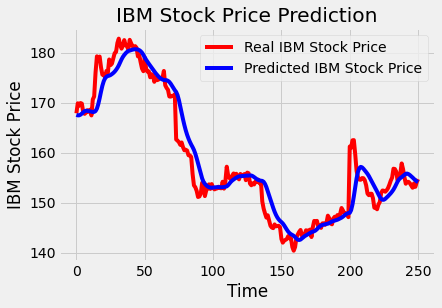

In [ ]:
# Visualizing the results for GRU
plot_predictions(test_set,GRU_predicted_stock_price)

In [ ]:
# Evaluating GRU
return_rmse(test_set,GRU_predicted_stock_price)

The root mean squared error is 3.239291098484749.


# -------------DNN method

# 4.ARIMA BASE MODEL

In [ ]:
# evaluate the finalized model on the validation dataset
import warnings
import itertools
import pandas as pd
from pandas import datetime
from pandas import DataFrame
from pandas import concat
from pandas import read_csv
from pandas import Grouper
from pandas import Series
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.ar_model import AR

from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from scipy.stats import boxcox
from sklearn.metrics import mean_squared_error
from math import sqrt
from math import exp
from math import log

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# First, we get the data
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Time series forcasting/Kaggle 30 Stock time series/Data/IBM_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
dataset.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


In [ ]:
# Checking for missing values
training_set = dataset[:'2016'].iloc[:,1:2] # only one column
test_set = dataset['2017':].iloc[:,1:2]
# prepare data
series=training_set.High
training_set

,High
Date,
2006-01-03,82.55
2006-01-04,82.50
2006-01-05,82.90
2006-01-06,85.03
2006-01-09,84.25
...,...
2016-12-23,167.49
2016-12-27,167.98
2016-12-28,167.74


## Base model

In [ ]:

X = training_set.High
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
  # predict
  #print(i)
  yhat = history[-1] # Training set, predict from previous time step
  predictions.append(yhat)
  # observation
  obs = test[i] # current time step
  history.append(obs) # Add thsi current time step to history for next prediction
  #print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print(rmse)

1.9066268706556542


## Data Analysis

In [ ]:
series.describe()

count    2769.000000
mean      145.608797
std        38.933205
min        73.940000
25%       115.010000
50%       147.300000
75%       182.910000
max       215.900000
Name: High, dtype: float64

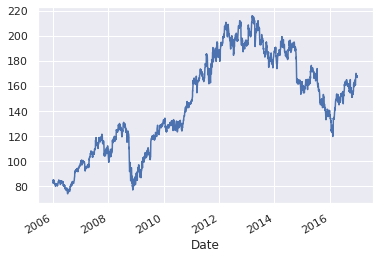

In [ ]:
series.plot()

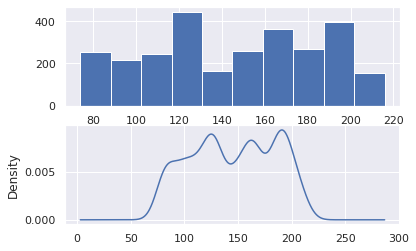

In [ ]:
plt.figure(1)
plt.subplot(211)
series.hist()
plt.subplot(212)
series.plot(kind='kde')
plt.show()

In [ ]:
series_df=pd.DataFrame(series).reset_index()
series_df

,Date,High
0,2006-01-03,82.55
1,2006-01-04,82.50
2,2006-01-05,82.90
3,2006-01-06,85.03
4,2006-01-09,84.25
...,...,...
2764,2016-12-23,167.49
2765,2016-12-27,167.98
2766,2016-12-28,167.74
2767,2016-12-29,166.99


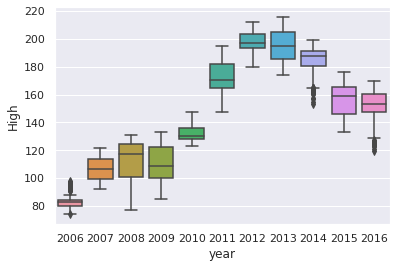

In [ ]:
series_df['year']=series_df['Date'].dt.year
sns.boxplot(x="year", y="High", data=series_df)

## Manually Configured ARIMA

In [ ]:
# create a differenced time series
def difference(dataset):
  diff = list()
  for i in range(1, len(dataset)):
    value = dataset[i] - dataset[i - 1]
    diff.append(value)
  return Series(diff)

In [ ]:
# difference data
X = series.values
stationary = difference(X)
stationary.index = series.index[1:]
stationary

Date
2006-01-04   -0.05
2006-01-05    0.40
2006-01-06    2.13
2006-01-09   -0.78
2006-01-10   -0.13
              ... 
2016-12-23   -0.74
2016-12-27    0.49
2016-12-28   -0.24
2016-12-29   -0.75
2016-12-30   -0.29
Length: 2768, dtype: float64

In [ ]:
# check if stationary
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.621582
p-value: 0.471900
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [ ]:
# check if stationary
result = adfuller(stationary)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: -18.269327
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


d value: 1

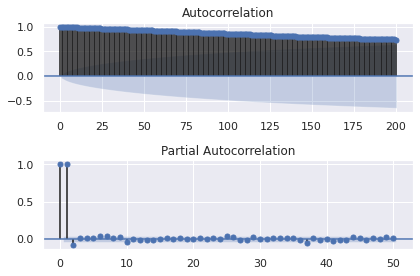

In [ ]:
plt.figure()
plt.subplot(211)
plot_acf(series, lags=200, ax=plt.gca())
plt.subplot(212)
plot_pacf(series, lags=50, ax=plt.gca())
plt.tight_layout()
plt.show()

ACF: p value 200
PACF: q value: 1

This quick analysis suggests an ARIMA(200,1,1) on the raw data may be a good starting point.

In [ ]:

# prepare data
X = series
X = X.astype('float32')
train_size = int(len(X) * 0.70)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
  # predict
  model = ARIMA(history, order=(1,1,1))
  model_fit = model.fit(disp=0)
  yhat = model_fit.forecast()[0]
  predictions.append(yhat)
  # observation
  obs = test[i]
  history.append(obs)
  #print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

RMSE: 1.746


## Grid Search ARIMA Hyperparameters

In [ ]:
# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
  # prepare training dataset
  X = X.astype('float32')
  train_size = int(len(X) * 0.50)
  train, test = X[0:train_size], X[train_size:]
  history = [x for x in train]
  # make predictions
  predictions = list()
  for t in range(len(test)):
    model = ARIMA(history, order=arima_order)
    model_fit = model.fit(disp=0)
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    history.append(test[t])
  # calculate out of sample error
  rmse = sqrt(mean_squared_error(test, predictions))
  return rmse

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
  dataset = dataset.astype('float32')
  best_score, best_cfg = float("inf"), None
  for p in p_values:
    for d in d_values:
      for q in q_values:
        order = (p,d,q)
        try:
          rmse = evaluate_arima_model(dataset, order)
          if rmse < best_score:
            best_score, best_cfg = rmse, order
          print('ARIMA%s RMSE=%.3f' % (order,rmse))
        except:
            continue
  print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

# evaluate parameters
p_values = range(0,3)
d_values = range(0, 2)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=49.524
ARIMA(0, 0, 1) RMSE=25.304
ARIMA(0, 1, 0) RMSE=1.908
ARIMA(0, 1, 1) RMSE=1.897
ARIMA(0, 1, 2) RMSE=1.898
ARIMA(1, 0, 0) RMSE=1.907
ARIMA(1, 1, 0) RMSE=1.898
Best ARIMA(0, 1, 1) RMSE=1.897


In [ ]:
order = (0,1,1)

## Review residual Errors

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


RMSE: 1.744
                0
count  831.000000
mean    -0.028901
std      1.744988
min    -12.682868
25%     -0.855445
50%     -0.060334
75%      0.898510
max      7.086908


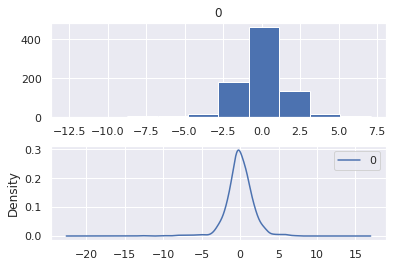

In [ ]:
# plot residual errors for ARIMA model
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.70)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
  # predict
  model = ARIMA(history, order)
  model_fit = model.fit(trend='nc', disp=0)
  yhat = model_fit.forecast()[0]
  predictions.append(yhat)
  # observation
  obs = test[i]
  history.append(obs)
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)
# errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())
plt.figure()
plt.subplot(211)
residuals.hist(ax=pyplot.gca())
plt.subplot(212)
residuals.plot(kind='kde', ax=plt.gca())
plt.show()

## Model Validation

RMSE: 1.540


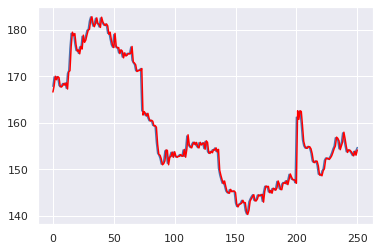

In [ ]:
X = training_set.High.values.astype('float32')
history = [x for x in X]

y = test_set.High.values.astype('float32')

# bias constant, could be calculated from in-sample mean residual
bias = residuals.mean()
predictions = list()

# rolling forecasts
for i in range(0, len(y)):
  # predict
  model = ARIMA(history, order)
  model_fit = model.fit(trend='nc', disp=0)
  yhat = bias + float(model_fit.forecast()[0])
  predictions.append(yhat)
  # observation
  obs = y[i]
  history.append(obs)
  #print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(y, predictions))
print('RMSE: %.3f' % rmse)
plt.plot(y)
plt.plot(predictions, color='red')
plt.show()

# ARIMA from master python finance book

In [ ]:
# First, we get the data
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Time series forcasting/Kaggle 30 Stock time series/Data/IBM_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
dataset.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


In [ ]:
# Define important value
split=int(len(dataset) * 0.90)
column=1
training_set=dataset[:split][dataset.columns[column]] # y train
test_set=dataset[split:][dataset.columns[column]] #reshape -1: lay het len
y_test=test_set # y test
print(training_set.shape)
print(test_set.shape)
training_set

(2718,)
(302,)


Date
2006-01-03     82.55
2006-01-04     82.50
2006-01-05     82.90
2006-01-06     85.03
2006-01-09     84.25
               ...  
2016-10-12    154.97
2016-10-13    154.22
2016-10-14    155.53
2016-10-17    155.89
2016-10-18    151.00
Name: High, Length: 2718, dtype: float64

In [ ]:
import time
def arima_grid_search(dataframe, s):
    df=dataframe
    p = d = q = range(2)
    param_combinations = list(itertools.product(p, d, q))

    lowest_aic, pdq, pdqs = None, None, None

    total_iterations = 0
    
    for order in param_combinations:    
        for (p, q, d) in param_combinations:
            seasonal_order = (p, q, d, s)
            print(seasonal_order)
            t0=time.time()
            total_iterations += 1
            try:
                model = SARIMAX(df, order=order, 
                    seasonal_order=seasonal_order, 
                    enforce_stationarity=False,
                    enforce_invertibility=False,
                    disp=False
                )
                model_result = model.fit(maxiter=200, disp=False)

                if not lowest_aic or model_result.aic < lowest_aic:
                    lowest_aic = model_result.aic
                    pdq, pdqs = order, seasonal_order

            except Exception as ex:
                continue
            t1=time.time()
            print('time: ',t1-t0)
    print(lowest_aic,pdq,pdqs)
    return lowest_aic, pdq, pdqs 

In [ ]:
lowest_aic, order, seasonal_order = arima_grid_search(training_set, 365)

In [ ]:
print(lowest_aic,order,seasonal_order)

In [ ]:
print('ARIMA{}x{}'.format(order, seasonal_order))
print('Lowest AIC: %.3f'%lowest_aic)

In [ ]:
# run grid search very long so just guest value:
order=(0,1,1)
seasonal_order=(0,1,1,365)

In [ ]:
model = SARIMAX(
    training_set,
    order=order,
    seasonal_order=seasonal_order,
    enforce_stationarity=False,
    enforce_invertibility=False,
    disp=False
)

model_results = model.fit(maxiter=200, disp=False)
print(model_results.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


KeyboardInterrupt: ignored

In [ ]:
model_results.plot_diagnostics(figsize=(12, 8));

In [ ]:
model_results.resid.describe()

## Predicting the model

In [ ]:
n1 = len(training_set)
n2 = len(test_set)
prediction = model_results.get_prediction(
    start=n1, 
    end=n2
)
prediction_ci = prediction.conf_int()
print(prediction_ci.head(3))

In [ ]:
predictions=prediction.predicted_mean
predictions

In [ ]:
rmse = sqrt(mean_squared_error(test_set, predictions))
print('RMSE: %.3f' % rmse)

In [ ]:
plt.figure(figsize=(12, 6))

ax = training_set['2010':].plot(label='actual')

prediction_ci.plot(
    ax=ax, style=['--', '--'],
    label='predicted/forecasted')

predictions.plot(
    ax=ax, style=['--'],
    label='predicted')

ci_index = prediction_ci.index
lower_ci = prediction_ci.iloc[:, 0]
upper_ci = prediction_ci.iloc[:, 1]

ax.fill_between(ci_index, lower_ci, upper_ci,
    color='r', alpha=.1)

ax.set_xlabel('Time (years)')
ax.set_ylabel('Prices')

plt.legend()
plt.show()

# CNN (sample, timesteps,features)

In [ ]:
# univariate mlp example
import warnings
from numpy import array
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras import optimizers
from keras.utils import plot_model
from keras.models import Sequential, Model
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten
from keras.layers import RepeatVector,TimeDistributed # For LSTM
from keras.optimizers import Adam
from keras import regularizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from keras.regularizers import l1
from keras.regularizers import l2
from keras.regularizers import l1_l2
from keras.layers import Dropout
from keras.layers import Activation
from keras.layers import Dense
from keras.metrics import categorical_crossentropy

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler


Using TensorFlow backend.


In [ ]:
# First, we get the data
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Time series forcasting/Kaggle 30 Stock time series/Data/IBM_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
dataset.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


## Train test split ***

In [ ]:
# Define important value
split=int(len(dataset) * 0.90)
column=1
n_steps = 60

In [ ]:
training_set=dataset[:split][dataset.columns[column]].values.reshape(-1,1) # y train
test_set=dataset[split:][dataset.columns[column]].values.reshape(-1,1) #reshape -1: lay het len
y_test=test_set # y test
print(training_set.shape)
print(test_set.shape)

(2718, 1)
(302, 1)


In [ ]:
training_set

array([[ 82.55],
       [ 82.5 ],
       [ 82.9 ],
       ...,
       [155.53],
       [155.89],
       [151.  ]])

Prepare training set

In [ ]:
X_train = []
y_train = []
# Scaling the training set
sc = StandardScaler()
training_set_scaled = sc.fit_transform(training_set)

for i in range(n_steps,len(training_set)):
    X_train.append(training_set_scaled[i-n_steps:i,0])
    y_train.append(training_set_scaled[i,0]) # y train chinh lai tu n_steps tro di
X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train.shape)
print(y_train.shape)

(2658, 60)
(2658,)


In [ ]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape)

(2658, 60, 1)


Perapare test set

In [ ]:
# Now to get the test set ready in a similar way as the training set.
# The following has been done so forst 60 entires of test set have 60 previous values which is impossible to get unless we take the whole 
# 'High' attribute data for processing
inputs = dataset[dataset.columns[column]][len(dataset)-len(y_test) - n_steps:].values

In [ ]:
# Lay them 60 gia tri truoc test set (an vo phan training set) de predict
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

print(dataset.shape)
print(y_test.shape)
print(inputs.shape)

# Preparing X_test and predicting the prices
X_test = []
for i in range(n_steps,len(inputs)):
    X_test.append(inputs[i-n_steps:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
print(X_test.shape)


(3020, 6)
(302, 1)
(362, 1)
(302, 60, 1)


In [ ]:
# define model
model_CNN = Sequential()
model_CNN.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model_CNN.add(MaxPooling1D(pool_size=2))
model_CNN.add(Flatten())
model_CNN.add(Dense(50, activation='relu'))
model_CNN.add(Dense(1))
model_CNN.compile(optimizer='adam', loss='mse')
model_CNN.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 59, 64)            192       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 29, 64)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1856)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 50)                92850     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 51        
Total params: 93,093
Trainable params: 93,093
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fitting to the training set
callbacks = [EarlyStopping(monitor="val_loss", patience=3, 
                           mode='min',restore_best_weights=True),
            ModelCheckpoint(filepath="best_model.h5",monitor="val_loss",
                            save_best_only=True)
            ]

model_CNN.fit(X_train,y_train,epochs=50,batch_size=32,
              validation_split=0.2,callbacks=callbacks)

Train on 2126 samples, validate on 532 samples
Epoch 1/50
2126/2126 [==============================] - 1s 366us/step - loss: 0.0722 - val_loss: 0.0414
Epoch 2/50
2126/2126 [==============================] - 0s 175us/step - loss: 0.0158 - val_loss: 0.0309
Epoch 3/50
2126/2126 [==============================] - 0s 171us/step - loss: 0.0122 - val_loss: 0.0281
Epoch 4/50
2126/2126 [==============================] - 0s 179us/step - loss: 0.0101 - val_loss: 0.0216
Epoch 5/50
2126/2126 [==============================] - 0s 175us/step - loss: 0.0086 - val_loss: 0.0171
Epoch 6/50
2126/2126 [==============================] - 0s 174us/step - loss: 0.0092 - val_loss: 0.0200
Epoch 7/50
2126/2126 [==============================] - 0s 179us/step - loss: 0.0076 - val_loss: 0.0134
Epoch 8/50
2126/2126 [==============================] - 0s 181us/step - loss: 0.0071 - val_loss: 0.0118
Epoch 9/50
2126/2126 [==============================] - 0s 168us/step - loss: 0.0068 - val_loss: 0.0117
Epoch 10/50
2126/

In [ ]:
y_train_pred=sc.inverse_transform(model_CNN.predict(X_train))
y_test_pred=sc.inverse_transform(model_CNN.predict(X_test))
print('train rmse:', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('test rmse:', np.sqrt(mean_squared_error(y_test, y_test_pred)))

train rmse: 150.8578290631793
test rmse: 3.2643943471532517


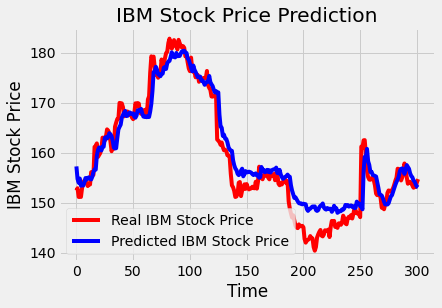

In [ ]:
# Visualizing the results for LSTM
plot_predictions(y_test,y_test_pred)

# LSTM (sample, timesteps,features)

In [ ]:
# Define important value
split=int(len(dataset) * 0.90)
column=1
n_steps = 60

In [ ]:
training_set=dataset[:split][dataset.columns[column]].values.reshape(-1,1) # y train
test_set=dataset[split:][dataset.columns[column]].values.reshape(-1,1) #reshape -1: lay het len
y_test=test_set # y test
print(training_set.shape)
print(test_set.shape)

(2718, 1)
(302, 1)


In [ ]:
X_train = []
y_train = []
# Scaling the training set
sc = StandardScaler()
training_set_scaled = sc.fit_transform(training_set)

for i in range(n_steps,len(training_set)):
    X_train.append(training_set_scaled[i-n_steps:i,0])
    y_train.append(training_set_scaled[i,0]) # y train chinh lai tu n_steps tro di
X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train.shape)
print(y_train.shape)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape)

(2658, 60)
(2658,)
(2658, 60, 1)


In [ ]:
inputs = dataset[dataset.columns[column]][len(dataset)-len(y_test) - n_steps:].values
# Lay them 60 gia tri truoc test set (an vo phan training set) de predict
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

print(dataset.shape)
print(y_test.shape)
print(inputs.shape)

# Preparing X_test and predicting the prices
X_test = []
for i in range(n_steps,len(inputs)):
    X_test.append(inputs[i-n_steps:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
print(X_test.shape)

(3020, 6)
(302, 1)
(362, 1)
(302, 60, 1)


## LSTM model 1

In [ ]:
# define model
model_LSTM = Sequential()
model_LSTM.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model_LSTM.add(Dense(10))
model_LSTM.add(Dense(1))
model_LSTM.compile(optimizer='adam', loss='mse')
model_LSTM.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50)                10400     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 10,921
Trainable params: 10,921
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fitting to the training set
callbacks = [EarlyStopping(monitor="val_loss", patience=3, 
                           mode='min',restore_best_weights=True),
            ModelCheckpoint(filepath="best_model.h5",monitor="val_loss",
                            save_best_only=True)
            ]

model_LSTM.fit(X_train,y_train,epochs=50,batch_size=32,
              validation_split=0.2,callbacks=callbacks)

Train on 2126 samples, validate on 532 samples
Epoch 1/50
2126/2126 [==============================] - 3s 1ms/step - loss: 0.2149 - val_loss: 0.0063
Epoch 2/50
2126/2126 [==============================] - 2s 1ms/step - loss: 0.0060 - val_loss: 0.0061
Epoch 3/50
2126/2126 [==============================] - 2s 1ms/step - loss: 0.0046 - val_loss: 0.0050
Epoch 4/50
2126/2126 [==============================] - 2s 1ms/step - loss: 0.0037 - val_loss: 0.0053
Epoch 5/50
2126/2126 [==============================] - 3s 1ms/step - loss: 0.0037 - val_loss: 0.0041
Epoch 6/50
2126/2126 [==============================] - 3s 1ms/step - loss: 0.0035 - val_loss: 0.0038
Epoch 7/50
2126/2126 [==============================] - 3s 1ms/step - loss: 0.0032 - val_loss: 0.0036
Epoch 8/50
2126/2126 [==============================] - 2s 1ms/step - loss: 0.0030 - val_loss: 0.0034
Epoch 9/50
2126/2126 [==============================] - 2s 1ms/step - loss: 0.0031 - val_loss: 0.0035
Epoch 10/50
2126/2126 [============

In [ ]:
y_train_pred=sc.inverse_transform(model_LSTM.predict(X_train))
y_test_pred=sc.inverse_transform(model_LSTM.predict(X_test))
print('train rmse:', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('test rmse:', np.sqrt(mean_squared_error(y_test, y_test_pred)))

train rmse: 150.91935834677975
test rmse: 1.8355073828619974


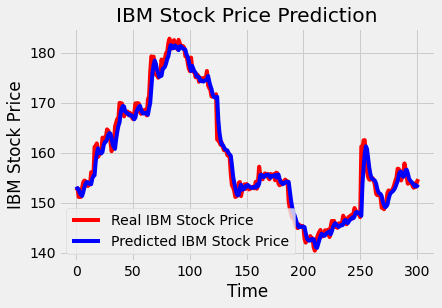

In [ ]:
# Visualizing the results for LSTM
plot_predictions(y_test,y_test_pred)

## LSTM model 2 (complex)

In [ ]:
# The LSTM architecture
model_LSTM_2 = Sequential()
# First LSTM layer with Dropout regularisation
model_LSTM_2.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1))) # 60 timesteps, 1 feature
model_LSTM_2.add(Dropout(0.2))
# Second LSTM layer
model_LSTM_2.add(LSTM(units=50, return_sequences=True))
model_LSTM_2.add(Dropout(0.2))
# Third LSTM layer
model_LSTM_2.add(LSTM(units=50, return_sequences=True))
model_LSTM_2.add(Dropout(0.2))
# Fourth LSTM layer
model_LSTM_2.add(LSTM(units=50))
model_LSTM_2.add(Dropout(0.2))
# The output layer
model_LSTM_2.add(Dense(units=1))

# Compiling the RNN
model_LSTM_2.compile(optimizer='rmsprop',loss='mean_squared_error')
model_LSTM_2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_4 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_5 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_6 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)               

In [ ]:
# Fitting to the training set
callbacks = [EarlyStopping(monitor="val_loss", patience=3, 
                           mode='min',restore_best_weights=True),
            ModelCheckpoint(filepath="best_model.h5",monitor="val_loss",
                            save_best_only=True)
            ]

model_LSTM_2.fit(X_train,y_train,epochs=50,batch_size=32,
              validation_split=0.2,callbacks=callbacks)

Train on 2126 samples, validate on 532 samples
Epoch 1/50
2126/2126 [==============================] - 12s 6ms/step - loss: 0.0923 - val_loss: 0.0398
Epoch 2/50
2126/2126 [==============================] - 10s 5ms/step - loss: 0.0512 - val_loss: 0.0264
Epoch 3/50
2126/2126 [==============================] - 10s 5ms/step - loss: 0.0421 - val_loss: 0.0553
Epoch 4/50
2126/2126 [==============================] - 10s 5ms/step - loss: 0.0410 - val_loss: 0.0184
Epoch 5/50
2126/2126 [==============================] - 10s 5ms/step - loss: 0.0357 - val_loss: 0.0340
Epoch 6/50
2126/2126 [==============================] - 10s 5ms/step - loss: 0.0344 - val_loss: 0.0140
Epoch 7/50
2126/2126 [==============================] - 10s 5ms/step - loss: 0.0330 - val_loss: 0.0279
Epoch 8/50
2126/2126 [==============================] - 10s 5ms/step - loss: 0.0311 - val_loss: 0.0146
Epoch 9/50
2126/2126 [==============================] - 10s 5ms/step - loss: 0.0292 - val_loss: 0.0140


In [ ]:
y_train_pred=sc.inverse_transform(model_LSTM_2.predict(X_train))
y_test_pred=sc.inverse_transform(model_LSTM_2.predict(X_test))
print('train rmse:', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('test rmse:', np.sqrt(mean_squared_error(y_test, y_test_pred)))

train rmse: 149.48407035454844
test rmse: 4.1483697080795805


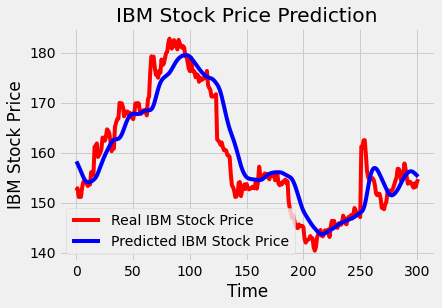

In [ ]:
# Visualizing the results for LSTM
plot_predictions(y_test,y_test_pred)

## Bidirect LSTM

In [ ]:
model_Bi_LSTM = Sequential()
model_Bi_LSTM.add(Bidirectional(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))) # 60 timesteps, 1 feature
model_Bi_LSTM.add(Bidirectional(LSTM(units=50)))
model_Bi_LSTM.add(Dense(10))
model_Bi_LSTM.add(Dense(1))
model_Bi_LSTM.compile(optimizer='adam', loss='mse')
#regressor_Bi.summary()

In [ ]:
# Fitting to the training set
callbacks = [EarlyStopping(monitor="val_loss", patience=3, 
                           mode='min',restore_best_weights=True),
            ModelCheckpoint(filepath="best_model.h5",monitor="val_loss",
                            save_best_only=True)
            ]

model_Bi_LSTM.fit(X_train,y_train,epochs=50,batch_size=32,
              validation_split=0.2,callbacks=callbacks)

Train on 2126 samples, validate on 532 samples
Epoch 1/50
2126/2126 [==============================] - 10s 5ms/step - loss: 0.0762 - val_loss: 0.0553
Epoch 2/50
2126/2126 [==============================] - 8s 4ms/step - loss: 0.0148 - val_loss: 0.0217
Epoch 3/50
2126/2126 [==============================] - 8s 4ms/step - loss: 0.0079 - val_loss: 0.0119
Epoch 4/50
2126/2126 [==============================] - 8s 4ms/step - loss: 0.0065 - val_loss: 0.0112
Epoch 5/50
2126/2126 [==============================] - 8s 4ms/step - loss: 0.0059 - val_loss: 0.0072
Epoch 6/50
2126/2126 [==============================] - 8s 4ms/step - loss: 0.0059 - val_loss: 0.0090
Epoch 7/50
2126/2126 [==============================] - 8s 4ms/step - loss: 0.0049 - val_loss: 0.0060
Epoch 8/50
2126/2126 [==============================] - 8s 4ms/step - loss: 0.0047 - val_loss: 0.0046
Epoch 9/50
2126/2126 [==============================] - 8s 4ms/step - loss: 0.0044 - val_loss: 0.0050
Epoch 10/50
2126/2126 [===========

train rmse: 151.3727704433219
test rmse: 2.3873106995111573


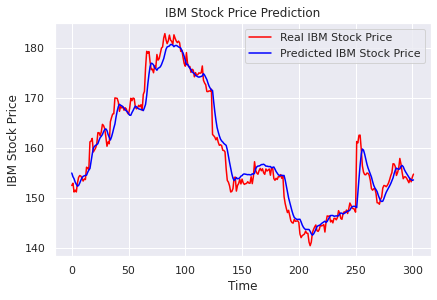

In [ ]:
y_train_pred=sc.inverse_transform(model_Bi_LSTM.predict(X_train))
y_test_pred=sc.inverse_transform(model_Bi_LSTM.predict(X_test))
print('train rmse:', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('test rmse:', np.sqrt(mean_squared_error(y_test, y_test_pred)))
# Visualizing the results for LSTM
plot_predictions(y_test,y_test_pred)

## GRU

In [ ]:
# The GRU architecture
model_GRU = Sequential()
# First GRU layer with Dropout regularisation
model_GRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],X_train.shape[2]), activation='tanh'))
model_GRU.add(GRU(units=50, activation='tanh'))
model_GRU.add(Dense(10))
model_GRU.add(Dense(1))
# Compiling the RNN
model_GRU.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
model_GRU.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_3 (GRU)                  (None, 60, 50)            7800      
_________________________________________________________________
gru_4 (GRU)                  (None, 50)                15150     
_________________________________________________________________
dense_31 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 11        
Total params: 23,471
Trainable params: 23,471
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fitting to the training set
callbacks = [EarlyStopping(monitor="val_loss", patience=3, 
                           mode='min',restore_best_weights=True),
            ModelCheckpoint(filepath="best_model.h5",monitor="val_loss",
                            save_best_only=True)
            ]

model_GRU.fit(X_train,y_train,epochs=50,batch_size=32,
              validation_split=0.2,callbacks=callbacks)

Train on 2126 samples, validate on 532 samples
Epoch 1/50
2126/2126 [==============================] - 6s 3ms/step - loss: 0.0867 - val_loss: 0.0051
Epoch 2/50
2126/2126 [==============================] - 6s 3ms/step - loss: 0.0041 - val_loss: 0.0049
Epoch 3/50
2126/2126 [==============================] - 6s 3ms/step - loss: 0.0040 - val_loss: 0.0041
Epoch 4/50
2126/2126 [==============================] - 5s 3ms/step - loss: 0.0039 - val_loss: 0.0041
Epoch 5/50
2126/2126 [==============================] - 6s 3ms/step - loss: 0.0040 - val_loss: 0.0041
Epoch 6/50
2126/2126 [==============================] - 5s 3ms/step - loss: 0.0039 - val_loss: 0.0041
Epoch 7/50
2126/2126 [==============================] - 5s 3ms/step - loss: 0.0039 - val_loss: 0.0042
Epoch 8/50
2126/2126 [==============================] - 5s 3ms/step - loss: 0.0037 - val_loss: 0.0048


train rmse: 151.11750067037377
test rmse: 2.142947552721181


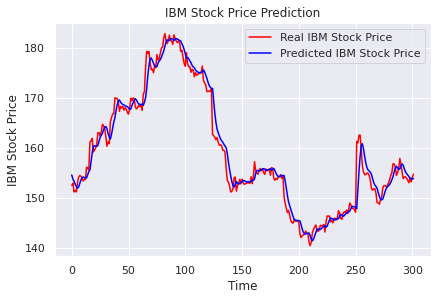

In [ ]:
y_train_pred=sc.inverse_transform(model_GRU.predict(X_train))
y_test_pred=sc.inverse_transform(model_GRU.predict(X_test))
print('train rmse:', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('test rmse:', np.sqrt(mean_squared_error(y_test, y_test_pred)))
# Visualizing the results for LSTM
plot_predictions(y_test,y_test_pred)

# CNN-LSTM (sample, subsequences, timesteps,features)

## Prepare data set

In [ ]:
# Define important value
split=int(len(dataset) * 0.90)
column=1
n_steps = 60
training_set=dataset[:split][dataset.columns[column]].values.reshape(-1,1) # y train
test_set=dataset[split:][dataset.columns[column]].values.reshape(-1,1) #reshape -1: lay het len
y_test=test_set # y test
print(training_set.shape)
print(test_set.shape)

(2718, 1)
(302, 1)


In [ ]:
X_train = []
y_train = []
# Scaling the training set
sc = StandardScaler()
training_set_scaled = sc.fit_transform(training_set)

for i in range(n_steps,len(training_set)):
    X_train.append(training_set_scaled[i-n_steps:i,0])
    y_train.append(training_set_scaled[i,0]) # y train chinh lai tu n_steps tro di
X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train.shape)
print(y_train.shape)

(2658, 60)
(2658,)


In [ ]:
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
subsequences=2
timesteps=int(X_train.shape[1]/subsequences)
X_train = X_train.reshape((X_train.shape[0],subsequences,timesteps, 1))
print(X_train.shape)

(2658, 2, 30, 1)


In [ ]:
# Now to get the test set ready in a similar way as the training set.
# The following has been done so forst 60 entires of test set have 60 previous values which is impossible to get unless we take the whole 
# 'High' attribute data for processing
inputs = dataset[dataset.columns[column]][len(dataset)-len(y_test) - n_steps:].values
# Lay them 60 gia tri truoc test set (an vo phan training set) de predict
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

print(dataset.shape)
print(y_test.shape)
print(inputs.shape)

# Preparing X_test and predicting the prices
X_test = []
for i in range(n_steps,len(inputs)):
    X_test.append(inputs[i-n_steps:i,0])
X_test = np.array(X_test)
X_test = X_test.reshape((X_test.shape[0],subsequences,timesteps, 1))
print(X_test.shape)


(3020, 6)
(302, 1)
(362, 1)
(302, 2, 30, 1)


## Model 1

In [ ]:
# define model
model_CNN_LSTM = Sequential()
model_CNN_LSTM.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, X_train.shape[2], X_train.shape[3])))
model_CNN_LSTM.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model_CNN_LSTM.add(TimeDistributed(Flatten()))
model_CNN_LSTM.add(LSTM(50, activation='relu'))
model_CNN_LSTM.add(Dense(10))
model_CNN_LSTM.add(Dense(1))
model_CNN_LSTM.compile(optimizer='adam', loss='mse')
model_CNN_LSTM.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_7 (TimeDist (None, None, 30, 64)      128       
_________________________________________________________________
time_distributed_8 (TimeDist (None, None, 15, 64)      0         
_________________________________________________________________
time_distributed_9 (TimeDist (None, None, 960)         0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)                202200    
_________________________________________________________________
dense_13 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 11        
Total params: 202,849
Trainable params: 202,849
Non-trainable params: 0
________________________________________________

In [ ]:
# Fitting to the training set
callbacks = [EarlyStopping(monitor="val_loss", patience=3, 
                           mode='min',restore_best_weights=True),
            ModelCheckpoint(filepath="best_model.h5",monitor="val_loss",
                            save_best_only=True)
            ]

model_CNN_LSTM.fit(X_train,y_train,epochs=50,batch_size=32,
              validation_split=0.2,callbacks=callbacks)

Train on 2126 samples, validate on 532 samples
Epoch 1/50
2126/2126 [==============================] - 1s 605us/step - loss: 0.0719 - val_loss: 0.0348
Epoch 2/50
2126/2126 [==============================] - 1s 356us/step - loss: 0.0159 - val_loss: 0.0339
Epoch 3/50
2126/2126 [==============================] - 1s 363us/step - loss: 0.0111 - val_loss: 0.0274
Epoch 4/50
2126/2126 [==============================] - 1s 366us/step - loss: 0.0081 - val_loss: 0.0191
Epoch 5/50
2126/2126 [==============================] - 1s 351us/step - loss: 0.0077 - val_loss: 0.0210
Epoch 6/50
2126/2126 [==============================] - 1s 359us/step - loss: 0.0072 - val_loss: 0.0147
Epoch 7/50
2126/2126 [==============================] - 1s 342us/step - loss: 0.0062 - val_loss: 0.0187
Epoch 8/50
2126/2126 [==============================] - 1s 346us/step - loss: 0.0054 - val_loss: 0.0150
Epoch 9/50
2126/2126 [==============================] - 1s 337us/step - loss: 0.0053 - val_loss: 0.0132
Epoch 10/50
2126/

In [ ]:
y_train_pred=sc.inverse_transform(model_CNN_LSTM.predict(X_train))
y_test_pred=sc.inverse_transform(model_CNN_LSTM.predict(X_test))
print('train rmse:', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('test rmse:', np.sqrt(mean_squared_error(y_test, y_test_pred)))

train rmse: 150.9132046976762
test rmse: 4.450947370856074


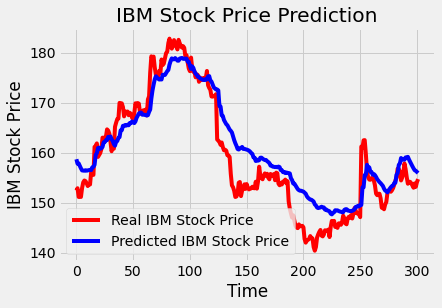

In [ ]:
# Visualizing the results for LSTM
plot_predictions(y_test,y_test_pred)

# MLP (sample, timesteps)

In [ ]:
# Define important value
split=int(len(dataset) * 0.90)
column=1
n_steps = 60

In [ ]:
training_set=dataset[:split][dataset.columns[column]].values.reshape(-1,1) # y train
test_set=dataset[split:][dataset.columns[column]].values.reshape(-1,1) #reshape -1: lay het len
y_test=test_set # y test
print(training_set.shape)
print(test_set.shape)

(2718, 1)
(302, 1)


In [ ]:
X_train = []
y_train = []
# Scaling the training set
sc = StandardScaler()
training_set_scaled = sc.fit_transform(training_set)

for i in range(n_steps,len(training_set)):
    X_train.append(training_set_scaled[i-n_steps:i,0])
    y_train.append(training_set_scaled[i,0]) # y train chinh lai tu n_steps tro di
X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train.shape)
print(y_train.shape)

(2658, 60)
(2658,)


In [ ]:
inputs = dataset[dataset.columns[column]][len(dataset)-len(y_test) - n_steps:].values
# Lay them 60 gia tri truoc test set (an vo phan training set) de predict
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)
print(y_test.shape)
print(inputs.shape)

# Preparing X_test and predicting the prices
X_test = []
for i in range(n_steps,len(inputs)):
    X_test.append(inputs[i-n_steps:i,0])
X_test = np.array(X_test)
print(X_test.shape)

(302, 1)
(362, 1)
(302, 60)


In [ ]:
# define model
#lr = 0.0003
#adam = optimizers.Adam(lr)
model_MLP = Sequential()
model_MLP.add(Dense(100, activation='relu', input_dim=X_train.shape[1]))
model_MLP.add(Dense(10))
model_MLP.add(Dense(1))
model_MLP.compile(optimizer='adam', loss='mse')

model_MLP.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 100)               6100      
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 101       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 2         
Total params: 6,203
Trainable params: 6,203
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fitting to the training set
callbacks = [EarlyStopping(monitor="val_loss", patience=3, 
                           mode='min',restore_best_weights=True),
            ModelCheckpoint(filepath="best_model.h5",monitor="val_loss",
                            save_best_only=True)
            ]

model_MLP.fit(X_train,y_train,epochs=50,batch_size=32,
              validation_split=0.2,callbacks=callbacks)

Train on 2126 samples, validate on 532 samples
Epoch 1/50
2126/2126 [==============================] - 0s 94us/step - loss: 0.0947 - val_loss: 0.0278
Epoch 2/50
2126/2126 [==============================] - 0s 50us/step - loss: 0.0124 - val_loss: 0.0192
Epoch 3/50
2126/2126 [==============================] - 0s 45us/step - loss: 0.0099 - val_loss: 0.0143
Epoch 4/50
2126/2126 [==============================] - 0s 51us/step - loss: 0.0086 - val_loss: 0.0122
Epoch 5/50
2126/2126 [==============================] - 0s 46us/step - loss: 0.0083 - val_loss: 0.0106
Epoch 6/50
2126/2126 [==============================] - 0s 43us/step - loss: 0.0078 - val_loss: 0.0131
Epoch 7/50
2126/2126 [==============================] - 0s 46us/step - loss: 0.0093 - val_loss: 0.0154
Epoch 8/50
2126/2126 [==============================] - 0s 45us/step - loss: 0.0093 - val_loss: 0.0080
Epoch 9/50
2126/2126 [==============================] - 0s 47us/step - loss: 0.0073 - val_loss: 0.0098
Epoch 10/50
2126/2126 [===

In [ ]:
y_train_pred=sc.inverse_transform(model_MLP.predict(X_train))
y_test_pred=sc.inverse_transform(model_MLP.predict(X_test))
print('train rmse:', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('test rmse:', np.sqrt(mean_squared_error(y_test, y_test_pred)))

train rmse: 149.79795382946236
test rmse: 2.5779887864684468


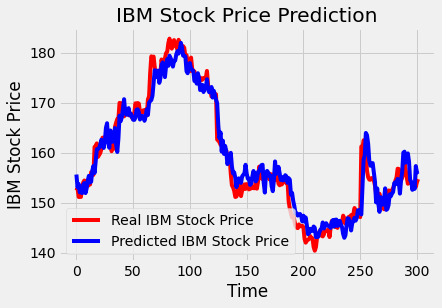

In [ ]:
# Visualizing the results for LSTM
plot_predictions(y_test,y_test_pred)

# Try ML method

In [ ]:
# Load libraries
import numpy as np
import pandas as pd
from numpy import arange
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate,cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.utils import shuffle

# Score:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer
#ML normal ML
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.linear_model import TheilSenRegressor, HuberRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.preprocessing import PolynomialFeatures

#ML ensembles
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor

#Special
import xgboost as xgb
from xgboost import XGBRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor

## Prepare sample

In [ ]:
# Define important value
split=int(len(dataset) * 0.90)
column=1
n_steps = 60

In [ ]:
training_set=dataset[:split][dataset.columns[column]].values.reshape(-1,1) # y train
test_set=dataset[split:][dataset.columns[column]].values.reshape(-1,1) #reshape -1: lay het len
y_test=test_set # y test
print(training_set.shape)
print(test_set.shape)

(2718, 1)
(302, 1)


In [ ]:
X_train = []
y_train = []
# Scaling the training set
sc = StandardScaler()
training_set_scaled = sc.fit_transform(training_set)

for i in range(n_steps,len(training_set)):
    X_train.append(training_set_scaled[i-n_steps:i,0])
    y_train.append(training_set_scaled[i,0]) # y train chinh lai tu n_steps tro di
X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train.shape)
print(y_train.shape)

(2658, 60)
(2658,)


In [ ]:
inputs = dataset[dataset.columns[column]][len(dataset)-len(y_test) - n_steps:].values
# Lay them 60 gia tri truoc test set (an vo phan training set) de predict
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)
print(y_test.shape)
print(inputs.shape)

# Preparing X_test and predicting the prices
X_test = []
for i in range(n_steps,len(inputs)):
    X_test.append(inputs[i-n_steps:i,0])
X_test = np.array(X_test)
print(X_test.shape)

(302, 1)
(362, 1)
(302, 60)


In [ ]:
# Creating a list of the classifiers
regression = {

    'LR':LinearRegression(),
    'LASSO':Lasso(), 
    'Ridge':Ridge(), #Boosting is more suitable
    'EN':ElasticNet(),
    'KNN':KNeighborsRegressor(),
    'CART':DecisionTreeRegressor(), #Very Long
    'SVR':SVR(),
    # New , Theil, Huber Regressor:
    'RANSAC':RANSACRegressor(),
    'TheilSen':TheilSenRegressor(),
    'Huber':HuberRegressor(),
    #New: Poly nominal
    'Poly2':Pipeline([('Poly2', PolynomialFeatures(degree=2)),
                      ('linear', LinearRegression(fit_intercept=False))]),
    
    #Ensemble:
    'AB':AdaBoostRegressor(), #Bagging (very long)
    'GBM':GradientBoostingRegressor(),  #Boosting
    'RF':RandomForestRegressor(), #Boosting
    'ET':ExtraTreesRegressor(), #Bagging (very long)
    #New from Matt cookbook
    'XGB':XGBRegressor(), #New Boosting
    'LGBM':LGBMRegressor(), #New Boosting   
}

In [ ]:
#Cross validate
import time
num_folds = 3
seed = 7

scoring = {'mse' : make_scorer(mean_squared_error), 
           'r2' : make_scorer(r2_score),
           }

names = []
train_rmse=[]
train_r2=[]
test_rmse=[]
test_r2=[]
fit_time=[]
time_=[]

for name, model in regression.items():
  print(name)
  start=time.time()
  estimator = model
  tscv = TimeSeriesSplit(n_splits=3)
  cv_results = cross_validate(estimator, X_train, y_train, cv=tscv, scoring=scoring,
                              return_train_score=True,
                              return_estimator=True
                              )

  # Time :
  time_cal=time.time() - start
  print('time : %0.3f' % (time_cal),'\n')
  
  #results.append(cv_results) # array of values
  names.append(name)
  train_rmse.append(np.sqrt(cv_results['train_mse'].mean()))
  train_r2.append(cv_results['train_r2'].mean())
  

  test_rmse.append(np.sqrt(cv_results['test_mse'].mean()))
  test_r2.append(cv_results['test_r2'].mean())
  

  fit_time.append(cv_results['fit_time'].mean())
  time_.append(time_cal)

  #print(cv_results.keys())
  print("%s: train_mse: %0.2f train_r2: %0.2f \
  test_mse: %0.2f test_r2: %0.2f fit_time: %0.2f" % 
       (name, cv_results['train_mse'].mean(),cv_results['train_r2'].mean(),
       cv_results['test_mse'].mean(),cv_results['test_r2'].mean(),
       cv_results['fit_time'].mean()))


LR
time : 0.065 

LR: train_mse: 0.00 train_r2: 1.00   test_mse: 0.00 test_r2: 0.98 fit_time: 0.02
LASSO
time : 0.023 

LASSO: train_mse: 0.47 train_r2: 0.07   test_mse: 1.71 test_r2: -16.64 fit_time: 0.00
Ridge
time : 0.017 

Ridge: train_mse: 0.00 train_r2: 1.00   test_mse: 0.00 test_r2: 0.98 fit_time: 0.00
EN
time : 0.071 

EN: train_mse: 0.26 train_r2: 0.26   test_mse: 1.62 test_r2: -16.20 fit_time: 0.02
KNN
time : 0.298 

KNN: train_mse: 0.00 train_r2: 1.00   test_mse: 0.18 test_r2: -0.35 fit_time: 0.01
CART
time : 0.228 

CART: train_mse: 0.00 train_r2: 1.00   test_mse: 0.15 test_r2: -0.24 fit_time: 0.07
SVR
time : 0.227 

SVR: train_mse: 0.00 train_r2: 0.99   test_mse: 0.92 test_r2: -8.63 fit_time: 0.05
RANSAC
time : 0.132 

RANSAC: train_mse: 0.00 train_r2: 1.00   test_mse: 0.00 test_r2: 0.98 fit_time: 0.04
TheilSen
time : 44.355 

TheilSen: train_mse: 0.00 train_r2: 1.00   test_mse: 0.00 test_r2: 0.98 fit_time: 14.78
Huber


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_ite

time : 0.317 

Huber: train_mse: 0.00 train_r2: 1.00   test_mse: 0.00 test_r2: 0.98 fit_time: 0.10
Poly2
time : 5.173 

Poly2: train_mse: 0.00 train_r2: 1.00   test_mse: 0.06 test_r2: 0.53 fit_time: 1.69
AB
time : 2.559 

AB: train_mse: 0.00 train_r2: 0.99   test_mse: 0.19 test_r2: -0.59 fit_time: 0.83
GBM
time : 6.811 

GBM: train_mse: 0.00 train_r2: 1.00   test_mse: 0.17 test_r2: -0.29 fit_time: 2.27
RF
time : 12.084 

RF: train_mse: 0.00 train_r2: 1.00   test_mse: 0.16 test_r2: -0.33 fit_time: 3.99
ET
time : 4.564 

ET: train_mse: 0.00 train_r2: 1.00   test_mse: 0.16 test_r2: -0.33 fit_time: 1.48
XGB
[02:26:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:26:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:26:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
time : 1

In [ ]:
df_results_val=pd.DataFrame(list(zip(names,test_rmse,test_r2,
                                     train_rmse,train_r2,
                                     fit_time,time_)),
                  columns=['Names','test_rmse','test_r2',
                           'train_rmse','train_r2',
                           'fit_time','time'])
df_results_val=df_results_val.sort_values(by='test_rmse',ascending=True)
#df_results_val.to_csv('/content/drive/My Drive/Colab Notebooks/df_results_val.csv')
df_results_val

,Names,test_rmse,test_r2,train_rmse,train_r2,fit_time,time
8,TheilSen,0.045704,0.983848,0.036278,0.996184,14.781823,44.355415
0,LR,0.046762,0.983333,0.035566,0.996401,0.018575,0.065270
7,RANSAC,0.046866,0.983238,0.035784,0.996327,0.040978,0.131764
9,Huber,0.047831,0.982400,0.037723,0.995927,0.102858,0.317217
2,Ridge,0.048709,0.981758,0.038378,0.995475,0.002938,0.017400
10,Poly2,0.251952,0.527144,0.003595,0.999989,1.690676,5.173453
5,CART,0.392220,-0.244201,0.000071,1.000000,0.073177,0.228434
15,XGB,0.400074,-0.285558,0.025902,0.998343,0.497768,1.523245
13,RF,0.401798,-0.329737,0.015243,0.999289,3.993155,12.084188
14,ET,0.404692,-0.325174,0.000029,1.000000,1.480951,4.564187


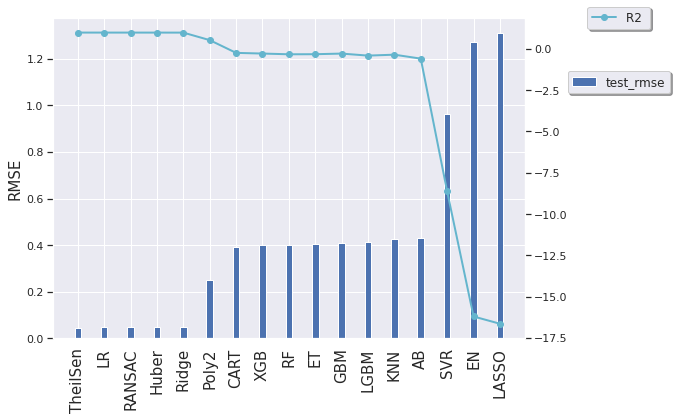

In [ ]:
# Define name:
name=df_results_val['Names']
test_rmse=df_results_val['test_rmse']
test_r2=df_results_val['test_r2']
#time = df_results_val['time']
# Plot:
x = np.arange(len(name))
fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x, test_rmse, color = 'b', width = 0.25,label='test_rmse')
#rects2 = ax.plot(x, test_r2, color = 'g',marker='o',label='test_r2')

ax2 = ax.twinx()
ax2.plot(x,test_r2,color ='c',marker='o',lw=2,label='R2 ')
ax2.secondary_yaxis('right')

ax.set_xticks(x)
ax.set_xticklabels(name,fontsize=15,rotation=90)
ax.set_ylabel('RMSE',fontsize=15)
ax2.set_ylabel('R2',fontsize=15)
#plt.gca().legend(loc ='center',bbox_to_anchor=(0.5, -0.2))
legend1=ax.legend(loc='center',bbox_to_anchor=(1.2, 0.8),shadow=True, fontsize='medium')
legend2=ax2.legend(loc='center',bbox_to_anchor=(1.2,1),shadow=True, fontsize='medium')

plt.axis('off')
fig.tight_layout()
plt.show()

LR
train rmse: 151.41251454041537
test rmse: 1.5425390759055972


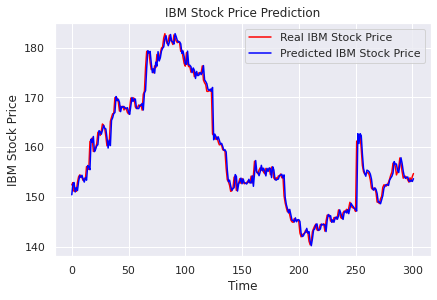

Ridge
train rmse: 151.40903651009745
test rmse: 1.5450502775990158


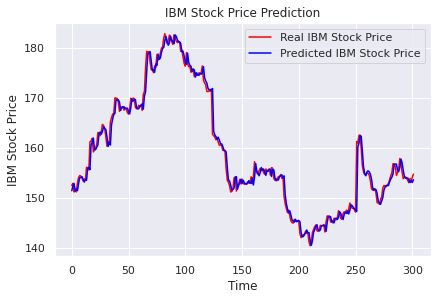

RANSAC
train rmse: 151.41251454041537
test rmse: 1.5425390759055972


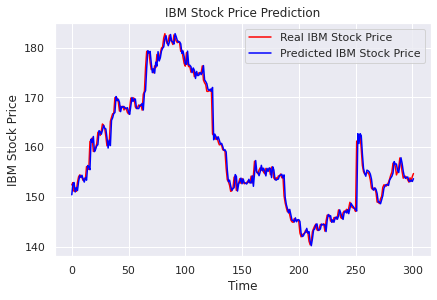

TheilSen
train rmse: 151.43641362102534
test rmse: 1.5830057116327083


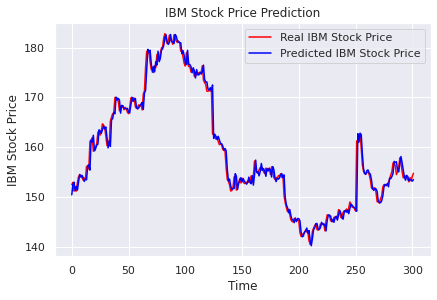

Huber
train rmse: 151.41424711997627
test rmse: 1.5520090082674145


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


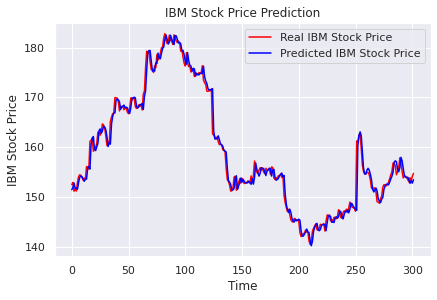

In [ ]:
final_model = {

    'LR':LinearRegression(),
    'Ridge':Ridge(), #Boosting is more suitable
    # New , Theil, Huber Regressor:
    'RANSAC':RANSACRegressor(),
    'TheilSen':TheilSenRegressor(),
    'Huber':HuberRegressor(),
}
for name, model in final_model.items(): 
  print(name)
  model.fit(X_train,y_train)
  y_train_pred=sc.inverse_transform(model.predict(X_train))
  y_test_pred=sc.inverse_transform(model.predict(X_test))
  print('train rmse:', np.sqrt(mean_squared_error(y_train, y_train_pred)))
  print('test rmse:', np.sqrt(mean_squared_error(y_test, y_test_pred)))
  # Visualizing the results for LSTM
  plot_predictions(y_test,y_test_pred)

# FB Prophet

In [ ]:
# First, we get the data
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Time series forcasting/Kaggle 30 Stock time series/Data/IBM_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
dataset.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


In [ ]:
# Define important value
split=int(len(dataset) * 0.90)
column=1
n_steps = 60

training_set=dataset[:split][dataset.columns[column]] # y train
test_set=dataset[split:][dataset.columns[column]] #reshape -1: lay het len
y_test=test_set # y test
print(training_set.shape)
print(test_set.shape)
training_set

(2718,)
(302,)


Date
2006-01-03     82.55
2006-01-04     82.50
2006-01-05     82.90
2006-01-06     85.03
2006-01-09     84.25
               ...  
2016-10-12    154.97
2016-10-13    154.22
2016-10-14    155.53
2016-10-17    155.89
2016-10-18    151.00
Name: High, Length: 2718, dtype: float64

In [ ]:
from fbprophet import Prophet
#prophet reqiures a pandas df at the below config 
# ( date column named as DS and the value column as Y)
training_set=pd.DataFrame(training_set).reset_index()
training_set.columns=['ds','y']
training_set

,ds,y
0,2006-01-03,82.55
1,2006-01-04,82.50
2,2006-01-05,82.90
3,2006-01-06,85.03
4,2006-01-09,84.25
...,...,...
2713,2016-10-12,154.97
2714,2016-10-13,154.22
2715,2016-10-14,155.53
2716,2016-10-17,155.89


In [ ]:
model = Prophet( yearly_seasonality=True) #instantiate Prophet with only yearly seasonality as our data is monthly 
model.fit(training_set) #fit the model with your dataframe

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# predict for five months in the furure and MS - month start is the frequency
future = model.make_future_dataframe(periods = 5, freq = 'MS')  
# now lets make the forecasts
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2718,2016-11-01,132.742111,122.597732,142.515944
2719,2016-12-01,130.324600,121.502175,139.111835
2720,2017-01-01,130.883993,121.605766,140.789880
2721,2017-02-01,130.085652,120.268497,140.051540
2722,2017-03-01,131.017348,120.492954,141.882057


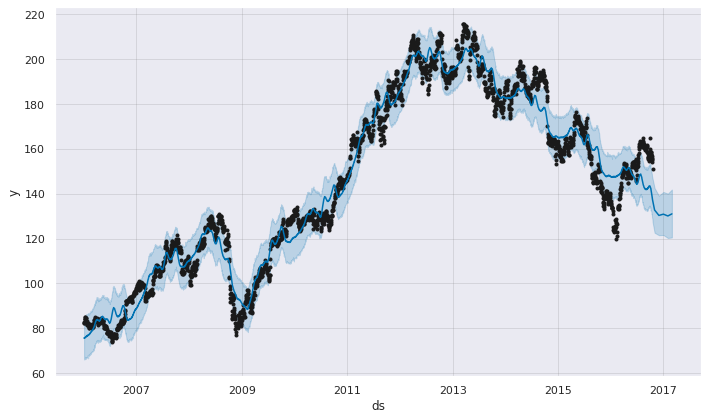

In [ ]:
model.plot(forecast)
plt.show()

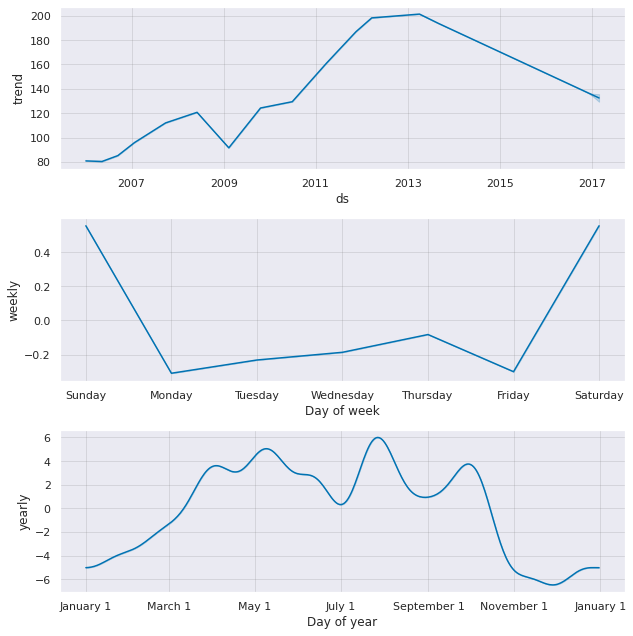

In [ ]:
model.plot_components(forecast)
plt.show()

In [ ]:
# Python
from fbprophet.plot import plot_plotly
import plotly.offline as py
#py.init_notebook_mode()

fig = plot_plotly(model, forecast)  # This returns a plotly Figure
py.iplot(fig)

# Conclusion:

ARIMA > ML Model (linear) > LSTM >GRU>BI LSTM> other Deep learning model